<a href="https://colab.research.google.com/github/jintanabp/ComputerVision/blob/main/OCR_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr -q
from google.colab import drive
drive.mount('/content/drive')

import easyocr
import keras_ocr
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [2]:
img_fns = glob('/content/drive/MyDrive/Colab Notebooks/opentopics/Detect Text in Images with Python/Medicine_data/*')

In [3]:
image_id = img_fns[8].split('/')[-1].split('.')[0]

In [4]:
# easyocr
reader = easyocr.Reader(['en'], gpu = True)

dfs = []
for img in tqdm(img_fns[:10]):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
import pandas as pd
from tqdm import tqdm
import keras_ocr

# Define the text classification function
def classify_text(text):
    # Example rule-based classification
    if 'paracetamol' in text:
        return 'paracetamol'
    elif 'another keyword' in text:
        return 'Category B'
    else:
        return 'Unclassified'

# Initialize Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# List to store dataframes
dfs = []

# Iterate through images
for img in tqdm(img_fns[:10]):
    # Perform text recognition
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]

    # Create dataframe from OCR results
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id

    # Classify text and add category column
    img_df['category'] = img_df['text'].apply(classify_text)

    # Append dataframe to list
    dfs.append(img_df)

# Concatenate dataframes
kerasocr_df = pd.concat(dfs)

# Apply text classification function to 'text' column
kerasocr_df['classification'] = kerasocr_df['text'].apply(classify_text)

# Display the resulting DataFrame
print(kerasocr_df)


Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


 10%|█         | 1/10 [00:10<01:37, 10.82s/it]

1/1 [==============================] - 2s 2s/step


 20%|██        | 2/10 [00:18<01:10,  8.83s/it]

1/1 [==============================] - 1s 1s/step


 30%|███       | 3/10 [00:24<00:54,  7.84s/it]

1/1 [==============================] - 3s 3s/step


 40%|████      | 4/10 [00:33<00:48,  8.06s/it]

1/1 [==============================] - 1s 1s/step


 50%|█████     | 5/10 [00:39<00:37,  7.48s/it]

1/1 [==============================] - 2s 2s/step


 60%|██████    | 6/10 [00:47<00:30,  7.61s/it]

1/1 [==============================] - 2s 2s/step


 70%|███████   | 7/10 [00:55<00:22,  7.65s/it]

1/1 [==============================] - 1s 1s/step


 80%|████████  | 8/10 [01:02<00:14,  7.50s/it]

1/1 [==============================] - 1s 1s/step


 90%|█████████ | 9/10 [01:07<00:06,  6.84s/it]

1/1 [==============================] - 4s 4s/step


100%|██████████| 10/10 [01:18<00:00,  7.84s/it]

           text                                               bbox  \
0             p  [[178.0, 73.0], [188.0, 73.0], [188.0, 87.0], ...   
1       tablets  [[150.0, 75.0], [179.0, 75.0], [179.0, 91.0], ...   
2   paracetamol  [[97.336624, 79.07393], [150.85315, 76.69542],...   
3           soo  [[98.0, 96.0], [113.0, 96.0], [113.0, 106.0], ...   
4            mg  [[113.0, 96.0], [127.0, 96.0], [127.0, 106.0],...   
..          ...                                                ...   
14       jeunts  [[78.0, 77.0], [111.0, 77.0], [111.0, 84.0], [...   
15         ssat  [[39.0, 99.0], [67.0, 99.0], [67.0, 110.0], [3...   
16        coass  [[136.0, 120.0], [159.0, 120.0], [159.0, 127.0...   
17           os  [[84.0, 121.0], [115.0, 121.0], [115.0, 125.0]...   
18            e  [[165.17932, 119.848274], [187.4414, 121.70345...   

        img_id      category classification  
0     images49  Unclassified   Unclassified  
1     images49  Unclassified   Unclassified  
2     images49   para

In [6]:
import pandas as pd
from tqdm import tqdm
import keras_ocr

# Define the text classification function
def classify_text(text):
    # Example rule-based classification
    if 'paracetamol' in text:
        return 'paracetamol'
    elif 'another keyword' in text:
        return 'Category B'
    else:
        return 'Unclassified'

# Initialize Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# List to store dataframes
dfs = []

# Iterate through images
for img in tqdm(img_fns[:10]):
    # Perform text recognition
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]

    # Create dataframe from OCR results
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id

    # Classify text and add category column
    img_df['category'] = img_df['text'].apply(classify_text)

    # Append dataframe to list
    dfs.append(img_df)

# Concatenate dataframes
kerasocr_df = pd.concat(dfs)

# Apply text classification function to 'text' column
kerasocr_df['classification'] = kerasocr_df['text'].apply(classify_text)

# Group by 'img_id' and find the most frequent category
img_labels = kerasocr_df.groupby('img_id')['category'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Merge img_labels with kerasocr_df on 'img_id'
kerasocr_df = pd.merge(kerasocr_df, img_labels, on='img_id', how='left', suffixes=('', '_label'))

# Display the resulting DataFrame
print(kerasocr_df)


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


 10%|█         | 1/10 [00:15<02:21, 15.77s/it]

1/1 [==============================] - 1s 1s/step


 20%|██        | 2/10 [00:23<01:27, 10.94s/it]

1/1 [==============================] - 1s 1s/step


 30%|███       | 3/10 [00:27<00:54,  7.85s/it]

1/1 [==============================] - 2s 2s/step


 40%|████      | 4/10 [00:32<00:41,  6.88s/it]

1/1 [==============================] - 1s 1s/step


 50%|█████     | 5/10 [00:39<00:33,  6.72s/it]

1/1 [==============================] - 2s 2s/step


 60%|██████    | 6/10 [00:43<00:23,  5.96s/it]

1/1 [==============================] - 4s 4s/step


 70%|███████   | 7/10 [00:51<00:20,  6.67s/it]

1/1 [==============================] - 2s 2s/step


 80%|████████  | 8/10 [00:57<00:12,  6.20s/it]

1/1 [==============================] - 1s 1s/step


 90%|█████████ | 9/10 [01:01<00:05,  5.61s/it]

1/1 [==============================] - 5s 5s/step


100%|██████████| 10/10 [01:10<00:00,  7.09s/it]

           text                                               bbox  \
0             p  [[178.0, 73.0], [188.0, 73.0], [188.0, 87.0], ...   
1       tablets  [[150.0, 75.0], [179.0, 75.0], [179.0, 91.0], ...   
2   paracetamol  [[97.336624, 79.07393], [150.85315, 76.69542],...   
3           soo  [[98.0, 96.0], [113.0, 96.0], [113.0, 106.0], ...   
4            mg  [[113.0, 96.0], [127.0, 96.0], [127.0, 106.0],...   
..          ...                                                ...   
73       jeunts  [[78.0, 77.0], [111.0, 77.0], [111.0, 84.0], [...   
74         ssat  [[39.0, 99.0], [67.0, 99.0], [67.0, 110.0], [3...   
75        coass  [[136.0, 120.0], [159.0, 120.0], [159.0, 127.0...   
76           os  [[84.0, 121.0], [115.0, 121.0], [115.0, 125.0]...   
77            e  [[165.17932, 119.848274], [187.4414, 121.70345...   

        img_id      category classification category_label  
0     images49  Unclassified   Unclassified   Unclassified  
1     images49  Unclassified   Unclas

In [7]:
import pandas as pd
from tqdm import tqdm
import keras_ocr

# Define the text classification function
def classify_text(text):
    # Example rule-based classification
    if 'paracetamol' in text:
        return 'paracetamol'
    elif 'Paracetamol' in text:
        return 'paracetamol'
    else:
        return 'Unclassified'

# Initialize Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# List to store dataframes
dfs = []

# Iterate through images
for img in tqdm(img_fns[:10]):
    # Perform text recognition
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]

    # Create dataframe from OCR results
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id

    # Classify text and add category column
    img_df['category'] = img_df['text'].apply(classify_text)

    # Append dataframe to list
    dfs.append(img_df)

# Concatenate dataframes
kerasocr_df = pd.concat(dfs)

# Apply text classification function to 'text' column
kerasocr_df['classification'] = kerasocr_df['text'].apply(classify_text)

# Group by 'img_id' and find the most frequent category among non-'Unclassified' categories
img_labels = kerasocr_df[kerasocr_df['category'] != 'Unclassified'].groupby('img_id')['category'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# For img_ids where all categories are 'Unclassified', find the most frequent category among all categories
unclassified_img_ids = set(kerasocr_df['img_id']) - set(img_labels['img_id'])
unclassified_labels = kerasocr_df[kerasocr_df['img_id'].isin(unclassified_img_ids)]['category'].value_counts().idxmax()
unclassified_df = pd.DataFrame({'img_id': list(unclassified_img_ids), 'category': [unclassified_labels]*len(unclassified_img_ids)})

# Concatenate the results
img_labels = pd.concat([img_labels, unclassified_df], ignore_index=True)

# Merge img_labels with kerasocr_df on 'img_id'
kerasocr_df = pd.merge(kerasocr_df, img_labels, on='img_id', how='left', suffixes=('', '_label'))

# Display the resulting DataFrame
print(kerasocr_df)


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


 10%|█         | 1/10 [00:08<01:18,  8.78s/it]

1/1 [==============================] - 1s 1s/step


 20%|██        | 2/10 [00:13<00:51,  6.43s/it]

1/1 [==============================] - 2s 2s/step


 30%|███       | 3/10 [00:18<00:40,  5.74s/it]

1/1 [==============================] - 2s 2s/step


 40%|████      | 4/10 [00:25<00:37,  6.22s/it]

1/1 [==============================] - 1s 1s/step


 50%|█████     | 5/10 [00:29<00:27,  5.42s/it]

1/1 [==============================] - 2s 2s/step


 60%|██████    | 6/10 [00:36<00:23,  5.94s/it]

1/1 [==============================] - 3s 3s/step


 70%|███████   | 7/10 [00:44<00:20,  6.68s/it]

1/1 [==============================] - 2s 2s/step


 80%|████████  | 8/10 [00:50<00:12,  6.48s/it]

1/1 [==============================] - 1s 1s/step


 90%|█████████ | 9/10 [00:58<00:06,  6.91s/it]

1/1 [==============================] - 4s 4s/step


100%|██████████| 10/10 [01:08<00:00,  6.90s/it]

           text                                               bbox  \
0             p  [[178.0, 73.0], [188.0, 73.0], [188.0, 87.0], ...   
1       tablets  [[150.0, 75.0], [179.0, 75.0], [179.0, 91.0], ...   
2   paracetamol  [[97.336624, 79.07393], [150.85315, 76.69542],...   
3           soo  [[98.0, 96.0], [113.0, 96.0], [113.0, 106.0], ...   
4            mg  [[113.0, 96.0], [127.0, 96.0], [127.0, 106.0],...   
..          ...                                                ...   
73       jeunts  [[78.0, 77.0], [111.0, 77.0], [111.0, 84.0], [...   
74         ssat  [[39.0, 99.0], [67.0, 99.0], [67.0, 110.0], [3...   
75        coass  [[136.0, 120.0], [159.0, 120.0], [159.0, 127.0...   
76           os  [[84.0, 121.0], [115.0, 121.0], [115.0, 125.0]...   
77            e  [[165.17932, 119.848274], [187.4414, 121.70345...   

        img_id      category classification category_label  
0     images49  Unclassified   Unclassified    paracetamol  
1     images49  Unclassified   Unclas

In [8]:
# Group by 'img_id' and select one row for each group
grouped_data = kerasocr_df.groupby('img_id').first().reset_index()

# Display the resulting DataFrame with only 'img_id' and 'category_label' columns
print(grouped_data[['img_id', 'category_label']])

       img_id category_label
0    images20    paracetamol
1   images209   Unclassified
2   images325   Unclassified
3   images332    paracetamol
4  images4031   Unclassified
5  images4083   Unclassified
6  images4112   Unclassified
7    images49    paracetamol
8  images5067   Unclassified
9  images5078   Unclassified


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_compare(img_fn, easyocr_df, kerasocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    keras_results, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)

    # Adjust layout to add spacing between subplots
    plt.subplots_adjust(wspace=0.4)  # Adjust the horizontal spacing between subplots
    plt.show()


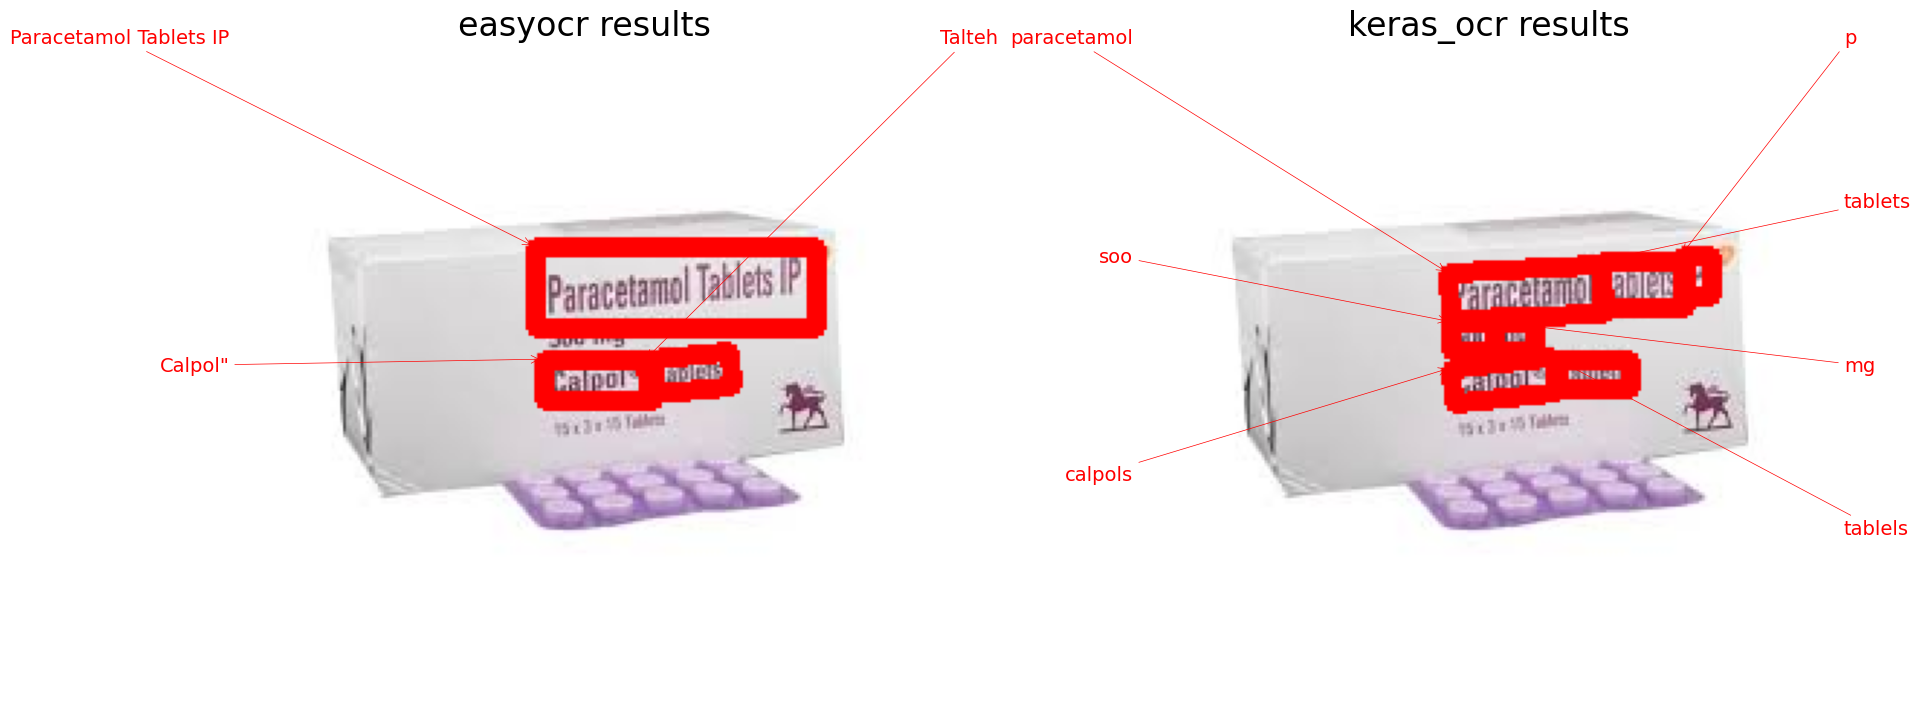

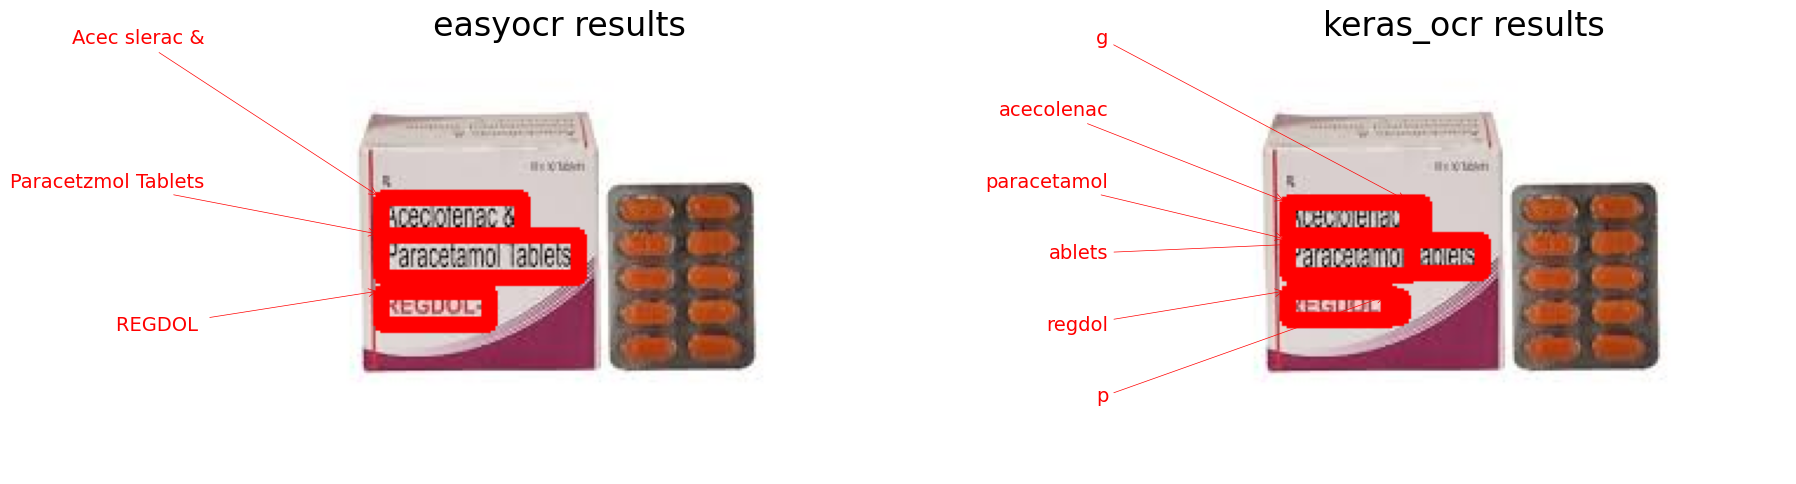

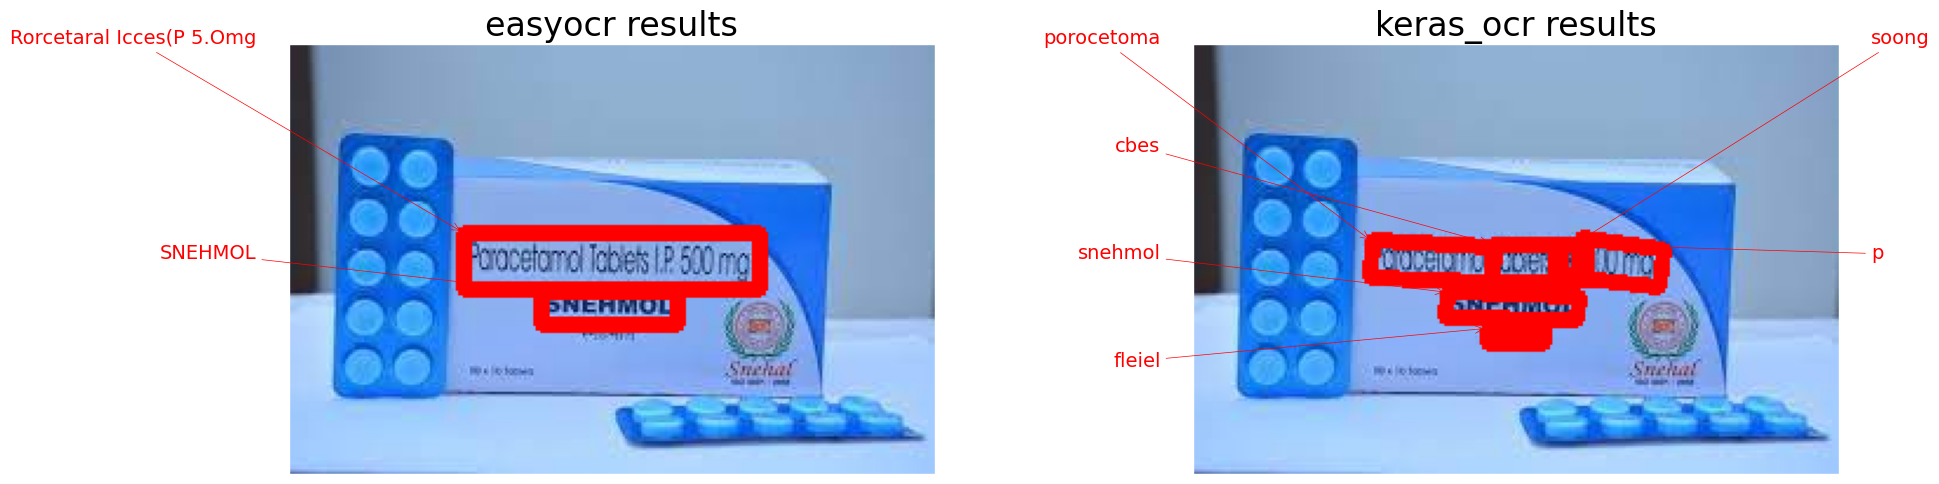

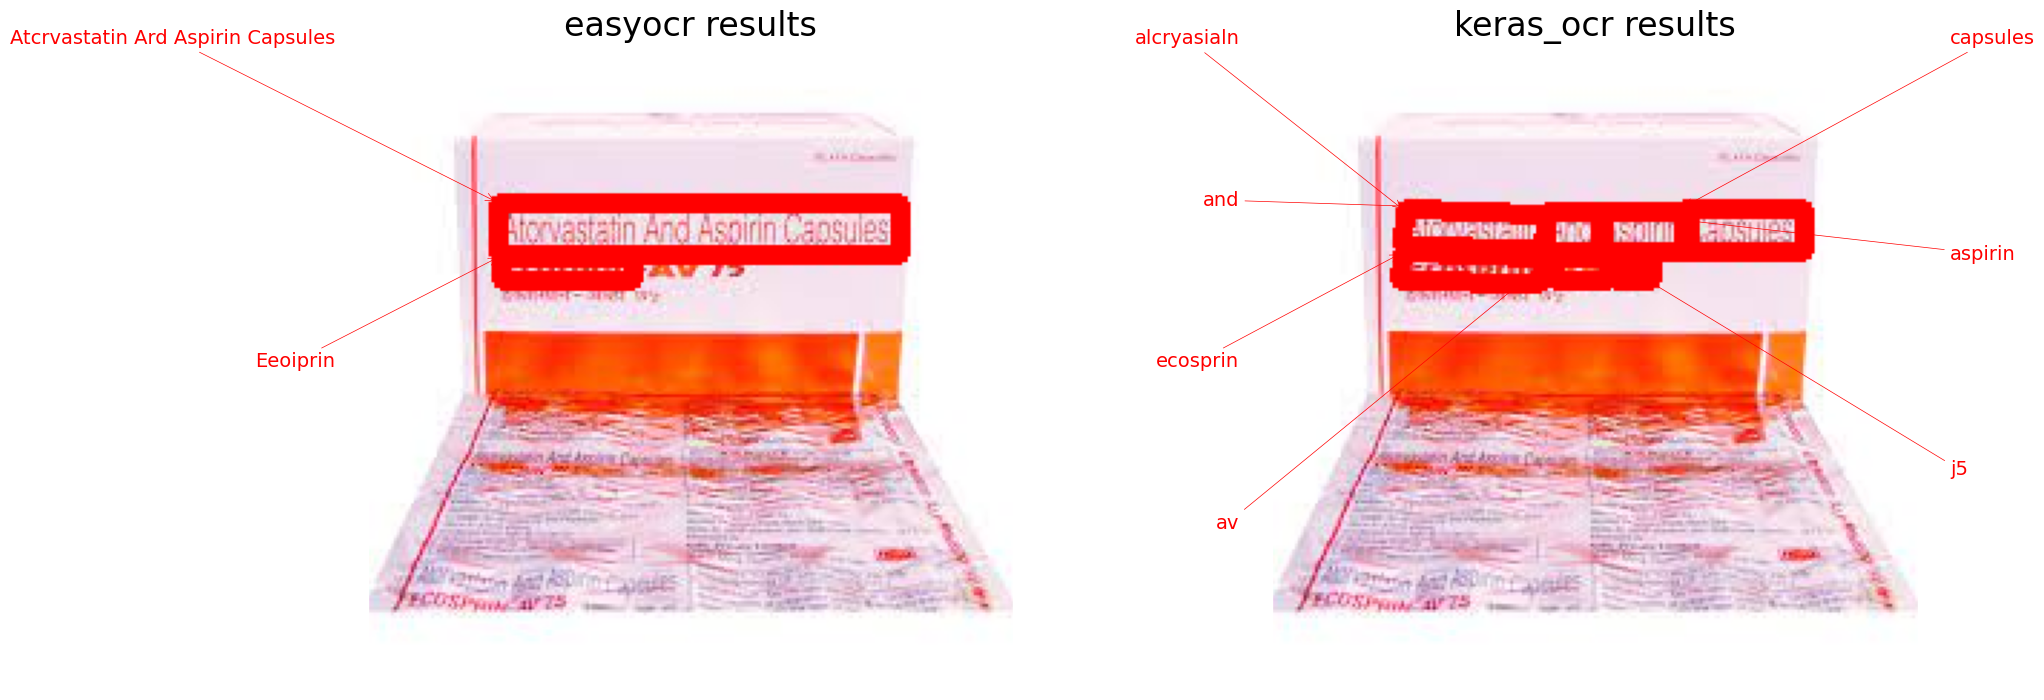

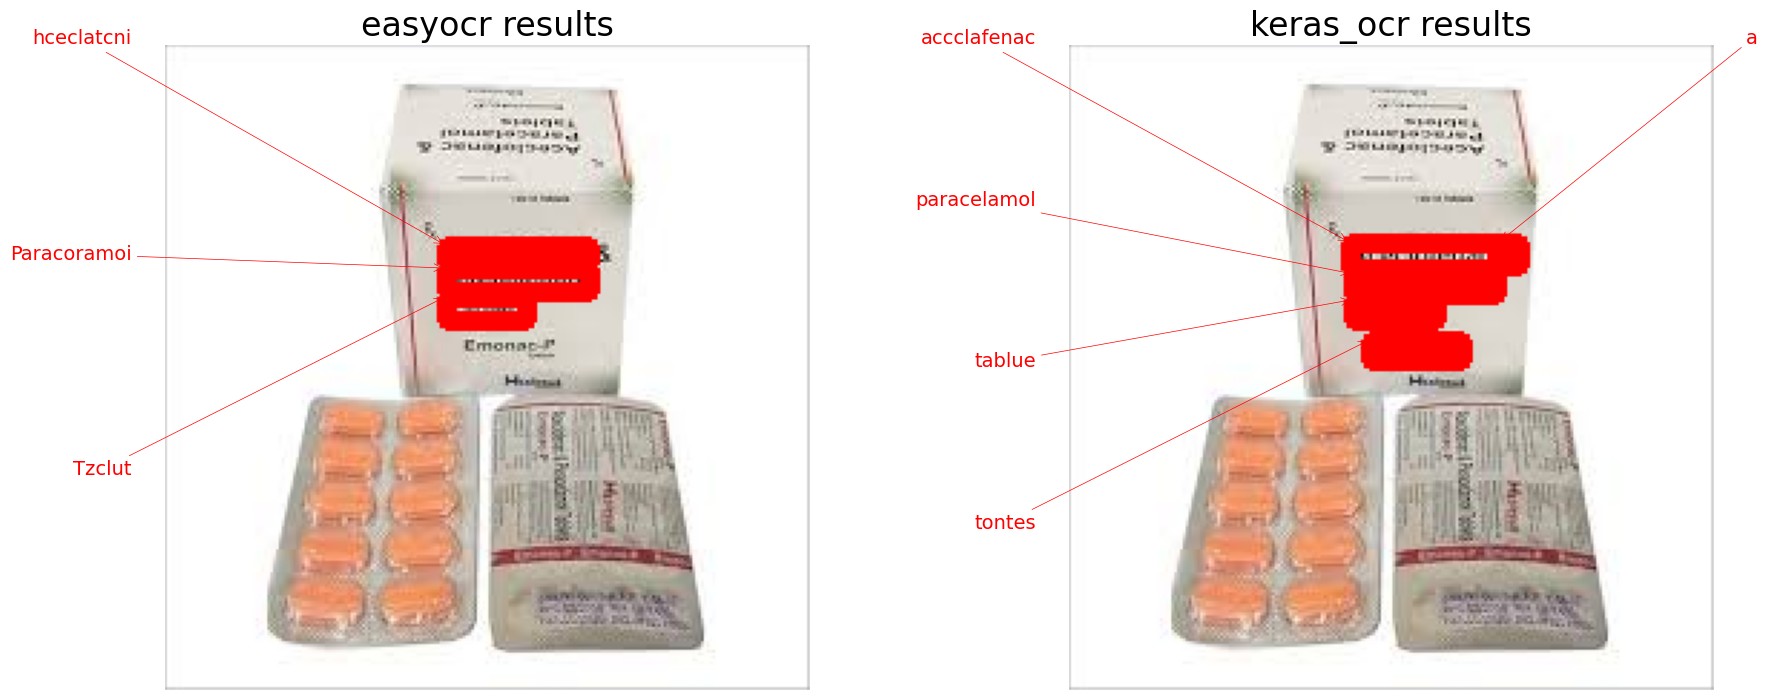

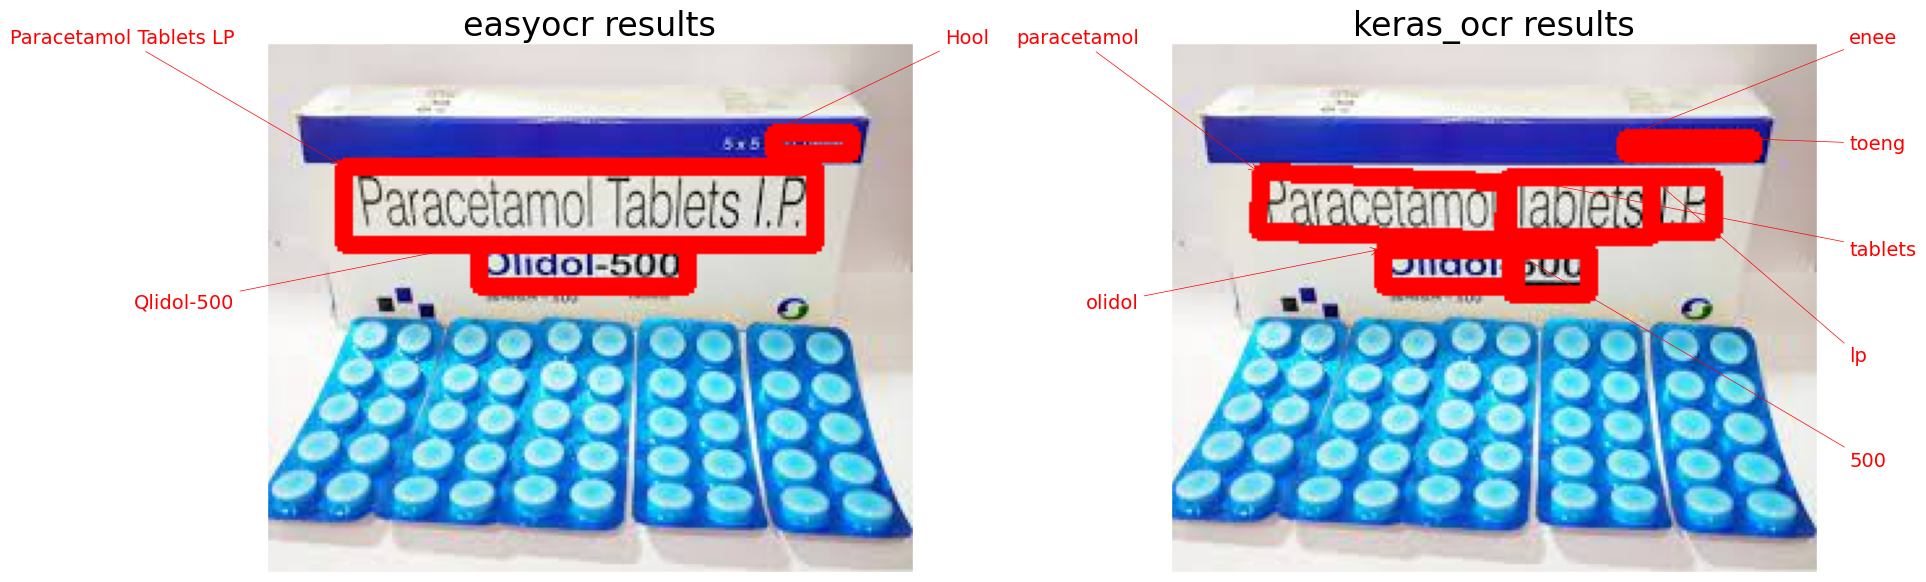

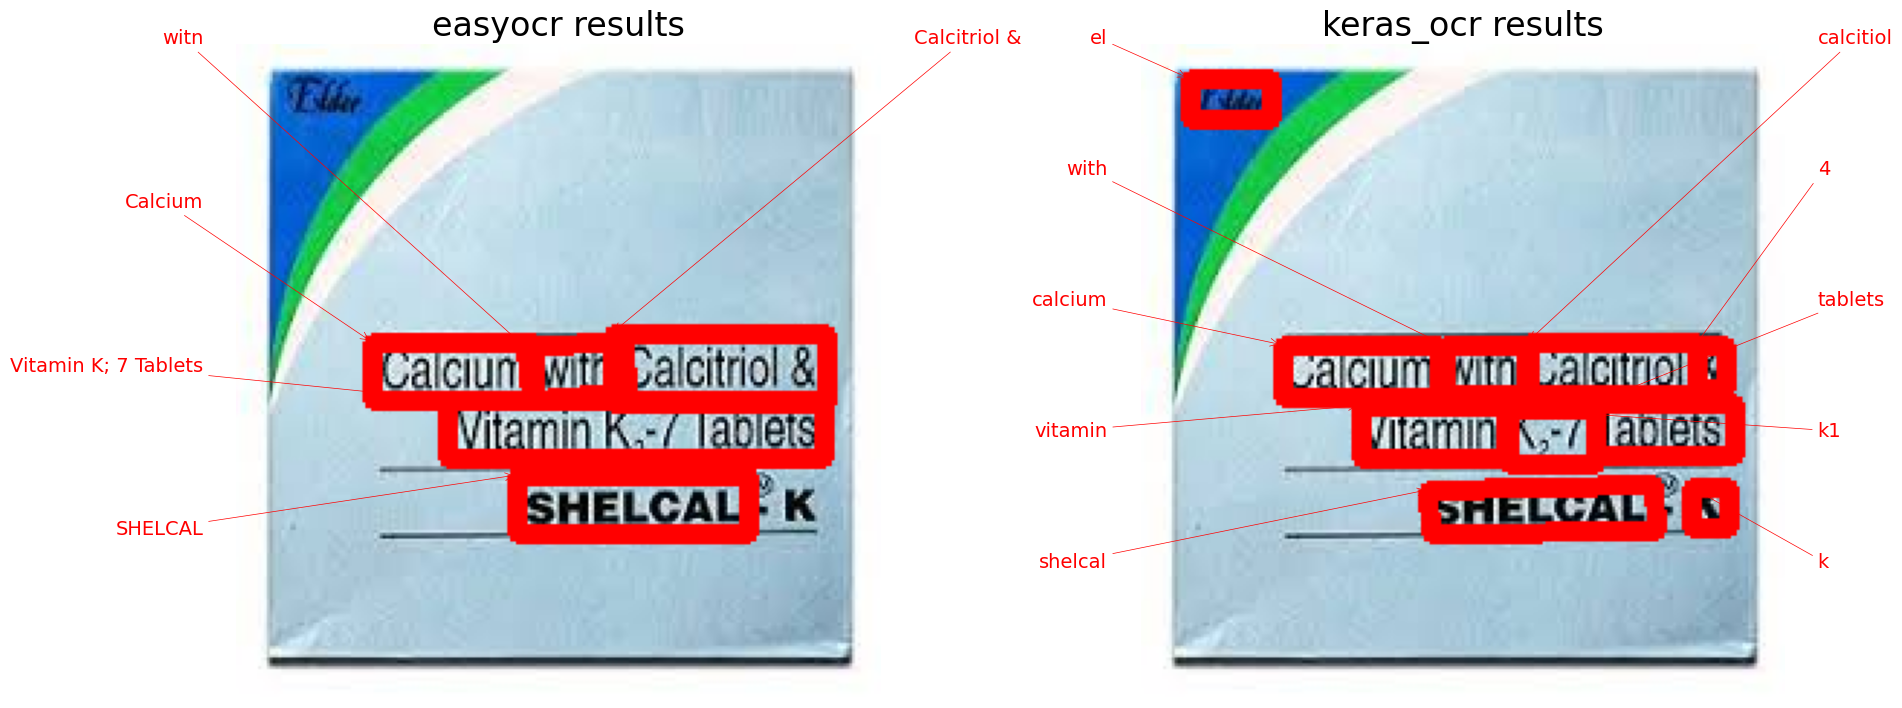

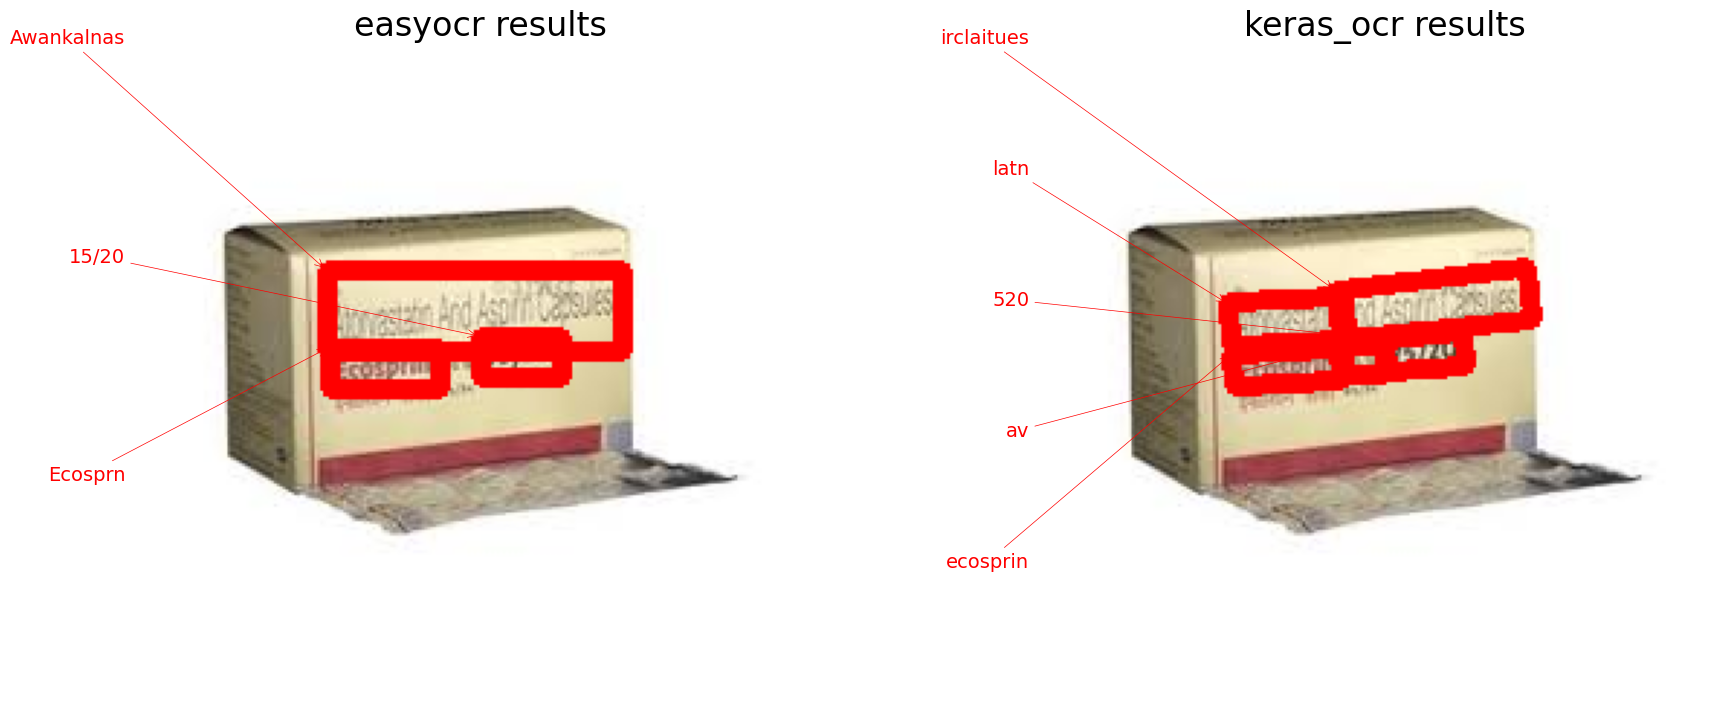

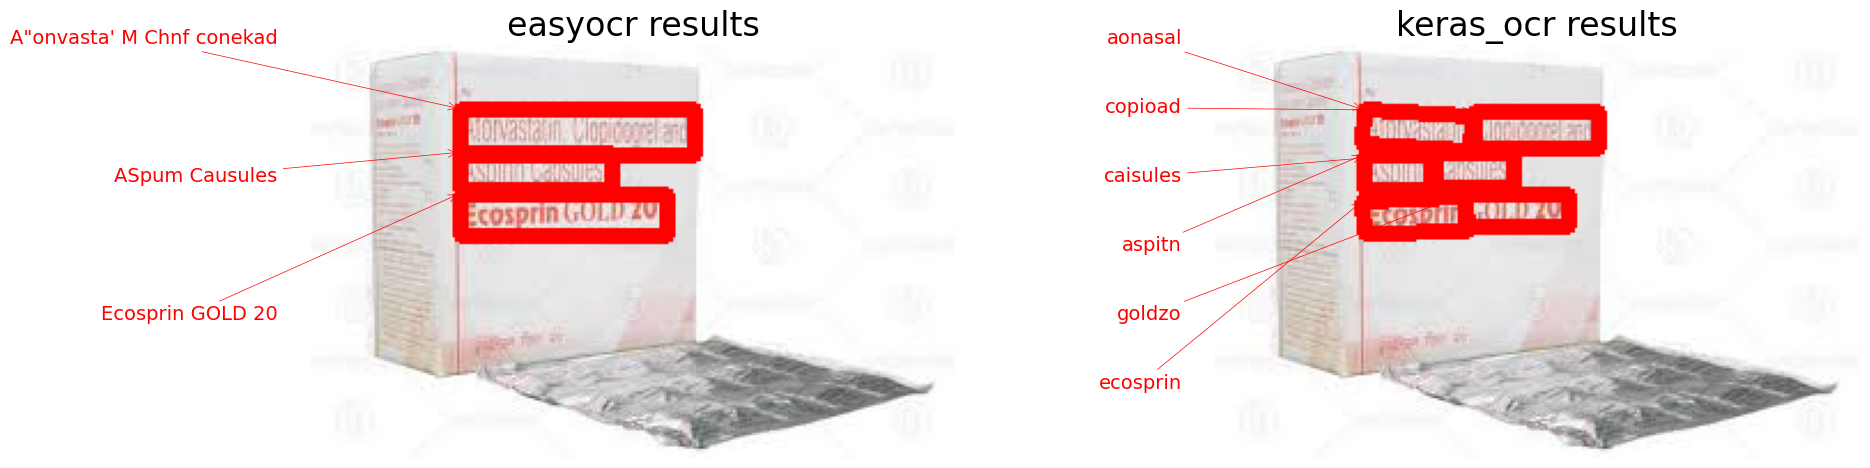

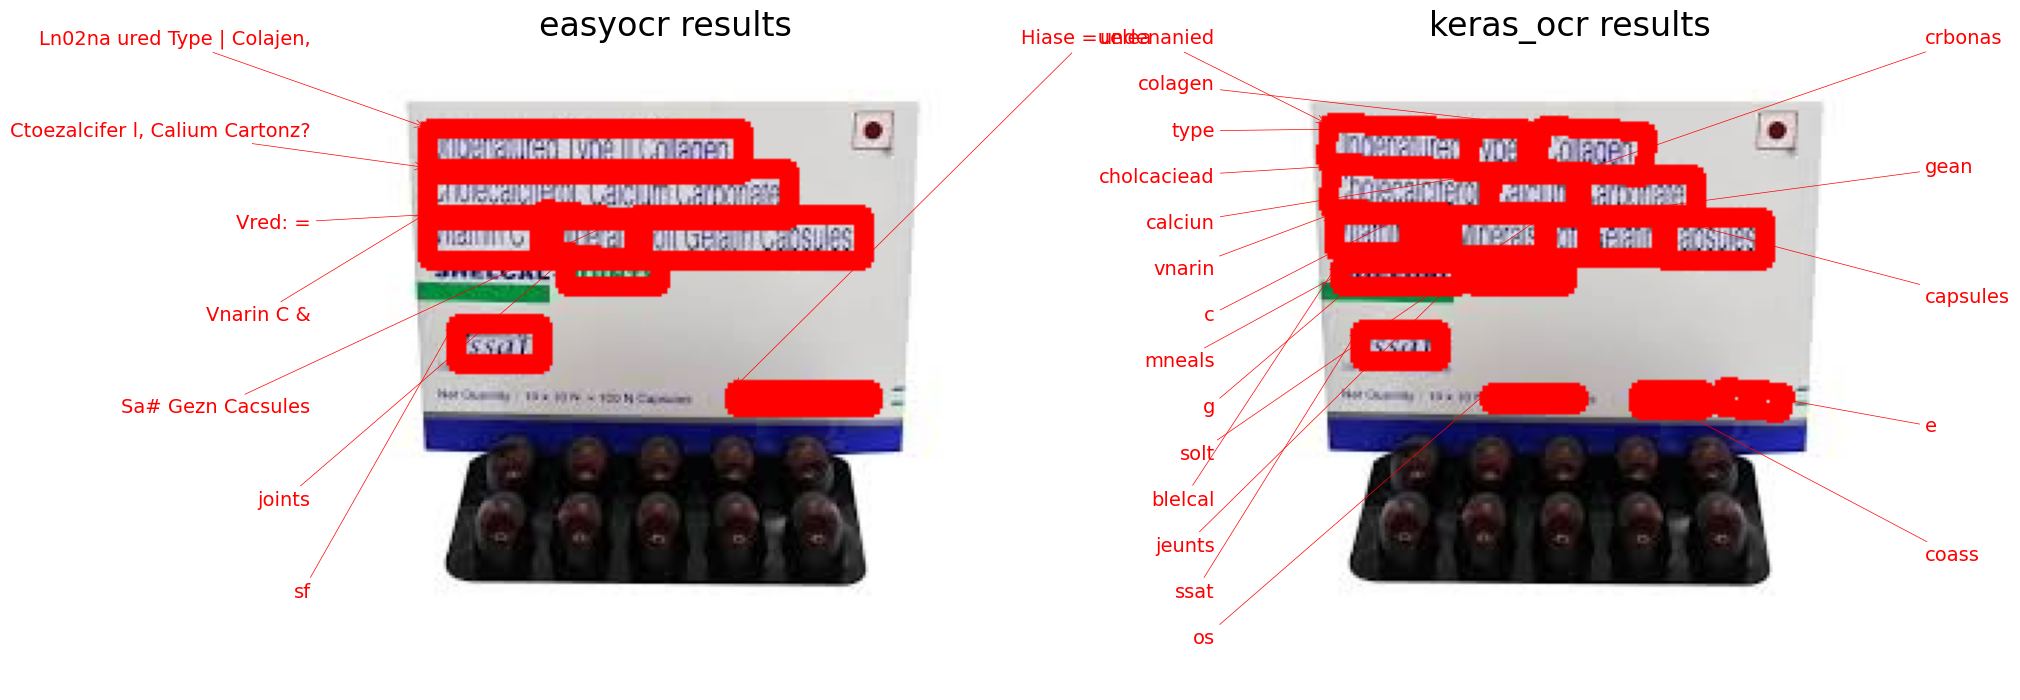

In [10]:
# Loop over results
for img_fn in img_fns[:10]:
    plot_compare(img_fn, easyocr_df, kerasocr_df)